<a href="https://colab.research.google.com/github/sajadamouei/peak-detection-chip-seq/blob/main/ML_Peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framework Information

In [ ]:
# GPU information
#!nvidia-smi -L
!nvidia-smi

Thu Jan 19 10:03:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# H.D.D information
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   24G   56G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
/dev/sda1        50G   25G   26G  49% /opt/bin/.nvidia
tmpfs           6.4G   32K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            79G   26G   53G  34% /content/drive


In [ ]:
# CPU infoemation
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
# Memory information
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         7024464 kB
MemAvailable:   10113068 kB
Buffers:           66460 kB
Cached:          2626964 kB
SwapCached:            0 kB
Active:           684720 kB
Inactive:        5324808 kB
Active(anon):       1016 kB
Inactive(anon):  2727712 kB
Active(file):     683704 kB
Inactive(file):  2597096 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               772 kB
Writeback:             0 kB
AnonPages:       3316160 kB
Mapped:           289400 kB
Shmem:              1288 kB
KReclaimable:      98512 kB
Slab:             134880 kB
SReclaimable:      98512 kB
SUnreclaim:        36368 kB
KernelStack:        5968 kB
PageTables:        33208 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    5822256 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       50560 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
import sys
print('python version= ',sys.version)
import tensorflow as tf
print('tf version= ',tf.__version__)
import keras
print('keras version= ',keras.__version__)

python version=  3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
tf version=  2.11.0
keras version=  2.11.0


In [ ]:
import pkg_resources

pkg_resources.get_distribution("google-colab").version

'1.0.0'

# Folders tree diagrams

In [ ]:
content = []
with open("/content/labels.bed")as f:
    for line in f:
        content.append(line.strip().split())

content

[['chr6', '74026739', '74033802', 'peakEnd'],
 ['chr6', '74036062', '74064918', 'noPeaks'],
 ['chr6', '74080861', '74086466', 'peakEnd'],
 ['chr6', '74086776', '74137477', 'noPeaks']]

In [ ]:
#Compare with bcell
content = []
with open("/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/H3K9me3_TDH_BP/samples/bcell/ERS206573/problems/chr4_68270000-75427379/coverage.bedGraph")as f:
    for line in f:
        content.append(line.strip().split())

content

[['chr4', '68270000', '68270016', '13'],
 ['chr4', '68270016', '68270042', '12'],
 ['chr4', '68270042', '68270064', '11'],
 ['chr4', '68270064', '68270094', '10'],
 ['chr4', '68270094', '68270123', '9'],
 ['chr4', '68270123', '68270143', '8'],
 ['chr4', '68270143', '68270148', '9'],
 ['chr4', '68270148', '68270152', '10'],
 ['chr4', '68270152', '68270155', '11'],
 ['chr4', '68270155', '68270158', '12'],
 ['chr4', '68270158', '68270164', '13'],
 ['chr4', '68270164', '68270171', '14'],
 ['chr4', '68270171', '68270179', '13'],
 ['chr4', '68270179', '68270251', '12'],
 ['chr4', '68270251', '68270295', '11'],
 ['chr4', '68270295', '68270300', '10'],
 ['chr4', '68270300', '68270306', '9'],
 ['chr4', '68270306', '68270338', '8'],
 ['chr4', '68270338', '68270344', '9'],
 ['chr4', '68270344', '68270349', '10'],
 ['chr4', '68270349', '68270376', '11'],
 ['chr4', '68270376', '68270380', '10'],
 ['chr4', '68270380', '68270383', '9'],
 ['chr4', '68270383', '68270386', '8'],
 ['chr4', '68270386', '6

In [ ]:
!pip install seedir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.2 MB/s 
     |████████████████████████████████| 197 kB 29.4 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=b828f08ade7641c0ada5bc1d8d42f8ec8c58836f45ef0a39d3eb79897fd23304
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
import seedir as sd
sd.seedir('/content', style='emoji')

📁 content/
├─📁 .config/
│ ├─📁 configurations/
│ │ └─📄 config_default
│ ├─📄 .last_update_check.json
│ ├─📄 active_config
│ ├─📄 .last_opt_in_prompt.yaml
│ ├─📄 .last_survey_prompt.yaml
│ ├─📄 gce
│ ├─📄 config_sentinel
│ └─📁 logs/
│   └─📁 2022.08.15/
│     ├─📄 13.44.41.125604.log
│     ├─📄 13.43.53.840714.log
│     ├─📄 13.44.40.370262.log
│     ├─📄 13.44.20.441098.log
│     ├─📄 13.44.12.999341.log
│     └─📄 13.43.32.260465.log
└─📁 sample_data/
  ├─📄 anscombe.json
  ├─📄 README.md
  ├─📄 california_housing_test.csv
  ├─📄 california_housing_train.csv
  ├─📄 mnist_test.csv
  └─📄 mnist_train_small.csv


# Extract and Decode the chip-seq dataset

In [ ]:
# find subfolders and extract .gz files in the chip-seq dataset

import os, gzip, shutil

z=0
o=0
def gz_extract(directory):
    extension = ".gz"
    os.chdir(directory)
    for item in os.listdir(directory): # loop through items in dir
      if item.endswith(extension): # check for ".gz" extension
          gz_name = os.path.abspath(item) # get full path of files
          file_name = (os.path.basename(gz_name)).rsplit('.',1)[0] #get file name for file within
          with gzip.open(gz_name,"rb") as f_in, open(file_name,"wb") as f_out:
              shutil.copyfileobj(f_in, f_out)
#          os.remove(gz_name) # delete zipped file




for path, subdirs, files in os.walk('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/H3K9me3_TDH_BP/samples'):
    for name in files:
      if (z%2) == 0:
        print(os.path.join(path))
        gz_extract(os.path.join(path))
        o+=1
      z+=1

print('Number of files = ',z)
print('Number of files extracted = ', o)

In [ ]:
import os

lst_ad = []
num = 0
co = 0

for path, subdirs, files in os.walk('C:/Users/47966/Desktop/delete/chip/H3K9me3_TDH_BP/samples'):
    for name in files:
        if (co%2) == 0:
            lst_ad.append(os.path.join(path))
            num+=1
        co+=1

print('Number of folders = ', num)

In [ ]:
# Decode coverage.bedgraph files

import numpy as np
import os

   
    
f_data = []
    
for l in range(len(lst_ad)): # Read the coverage and label files
    coverage = []
    with open(os.path.join(lst_ad[l],"coverage.bedGraph"))as f:
        for line in f:
            coverage.append(line.strip().split())

    labels = []
    with open(os.path.join(lst_ad[l],"labels.bed"))as f:
        for line in f:
            labels.append(line.strip().split())
        
    n = int(coverage[len(coverage)-1][2]) # Last genomic position number
    m = int(coverage[0][1]) # First genomic position number

    data = np.zeros(shape=(2,n-m)) # One array for each coverage file

    count = 0

    for i in range(len(coverage)): # Decode the encoded coverage file in a 2D arry
        for j in range(int(coverage[i][2])-int(coverage[i][1])):
            data[0,count] = int(coverage[i][1]) + j + 1
            data[1,count] = int(coverage[i][3])
            count += 1
        
    for i in range(len(labels)): # Save the labeled parts of coverage file based label file from the 2D array
            
        t, s_point = np.where(data == int(labels[i][1]))
        t, e_point = np.where(data == int(labels[i][2]))
        s_point = int(s_point)-5000 # Pick the labelled sequence with addtional  5000 lenght before start point
        e_point = int(e_point)+5000 # Pick the labelled sequence with addtional  5000 lenght after end point
        
        f_data.append(coverage[0][0])
        f_data.append(list(data[1,s_point:e_point]))
        f_data.append(labels[i][3])

    print(l)

In [ ]:
import pickle # Save decoded and labeled dataset in a list .ob file
with open('C:/Users/47966/Desktop/delete/chip/f_data2.ob', 'wb') as fp:
    pickle.dump(f_data, fp)

# Pre-Processing

In [ ]:
# Load decoded dataset
# H3K9me3_TDH_other folder

# The dataset list lenght is 1620,there are 540 sequences, in this list for each sequences have a chromosome name, a sequence and a label. 
# Each labelled sequences has 10,000 addtinal unlabelled data, 5,000 before labelled sequence and 5,000 after it
# In the next stepthe addtional part will be adjust with the specified "pick_more" option
# Data structure is like: [chromosom,sequence,label,chromosom,sequence,label,...,chromosom,sequence,label]

import numpy as np
import pickle

with open ('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/f_data2.ob', 'rb') as fp:
    lst_data = pickle.load(fp)

print("Length of dataset list: ",len(lst_data))

Length of dataset list:  1620


In [ ]:
# Number of Peak and NoPeka sequences before using sliding windows technique

count_nopeaks = sum(1 for i in lst_data if i == "noPeaks")

print("Number of Peaks sequnces = " , 540-count_nopeaks)
print("Number of noPeaks sequnces = " , count_nopeaks)

Number of Peaks sequnces =  253
Number of noPeaks sequnces =  287


In [ ]:
# Is there any "Peaks" label in the dataset?
j=0
for i in range(0,len(lst_data),3):
  if lst_data[i+2] == 'peaks':
    j+-1
  print(lst_data[i+2])
print('There are' ,j, 'peaks labels')

noPeaks
peakStart
noPeaks
peakStart
peakEnd
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
peakStart
noPeaks
peakStart
peakEnd
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
peakStart
noPeaks
peakStart
peakEnd
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
peakStart
noPeaks
peakStart
peakEnd
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
noPeaks
peakEnd
noPeaks
noPeaks
noPeaks
peakEnd
noPeaks
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
noPeaks
peakStart
noPeaks
peakStart
peakEnd
noPeaks
peakStart
peakEnd
noPeaks
noPeaks
peakStart


In [ ]:
# Total length of all NoPeaks and Peaks sequences

nopeaks_length = 0
peaks_length = 0
for i in range(0, len(lst_data), 3):
    if lst_data[i+2] == "noPeaks":
        nopeaks_length += len(lst_data[i+1])
    else:
        peaks_length += len(lst_data[i+1])

print("Sum of length of sequences with noPeaks label:", nopeaks_length)
print("Sum of length of sequences with peaks label:", peaks_length)

Sum of length of sequences with noPeaks label: 11590675
Sum of length of sequences with peaks label: 4122705


In [ ]:
# Specify window size for picking sequences and shift size for moveing on

win_size = 4001 #@param {type:"slider", min:1000, max:10001, step:500}

shift_size = 500 #@param {type:"slider", min:50, max:3000, step:50}

# Pick more for each side of a sequence
pick_more = 1500 #@param {type:"slider", min:0, max:5000, step:500}

In [ ]:
# Pick sequnces with specified addtional lenght

seq_size = 0
for i in range (1,len(lst_data),3):
  seq_size =len(lst_data[i]) - 10000 # Sequence length before adding 5000 on both sides is len(sequence) - 10,000
  lst_data[i] = lst_data[i][5000-pick_more:5000+seq_size+pick_more] # 

In [ ]:
# Make train and test with diffrent shift_size for nopeak sequences

lst_train = []
lst_lbl = []
nu_pseq = 0
nu_npseq = 0

for i in range(1,len(lst_data),3): # Go through all sequences
  s_point = 0
  if lst_data[i+1] == "noPeaks":
    while (s_point+win_size<=len(lst_data[i])): # Selection of sequences with window size
      lst_train.append(lst_data[i][s_point:s_point+win_size])
      s_point = s_point + (shift_size*6)
      lst_lbl.append(0)
      nu_npseq+=1

  else:
      while (s_point+win_size<=len(lst_data[i])):
        lst_train.append(lst_data[i][s_point:s_point+win_size])
        s_point+=shift_size
        lst_lbl.append(1)
        nu_pseq+=1
      

print("Number of Peaks sequnces = " , nu_pseq)
print("Number of noPeaks sequnces = " , nu_npseq)

Number of Peaks sequnces =  2835
Number of noPeaks sequnces =  2979


In [ ]:
#***When I use these libraries and these shapes of array for labels, traditional ML gives a warning for converting the shape array.***
'''
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

print(len(lst_lbl))
lb = LabelBinarizer()
train_label = lb.fit_transform(lst_lbl)
cat_train_label = to_categorical(train_label,num_classes=2)
print(train_label.shape)
print(cat_train_label.shape)
'''

27792
(27792, 1)
(27792, 2)


In [ ]:
# Convert lists to arrays

train_data = np.array(lst_train).astype('float32')
train_label = np.array(lst_lbl).astype('float32')

print('Data array shape = ', train_data.shape)
print('Label array shape = ', train_label.shape)

Data array shape =  (5814, 4001)
Label array shape =  (5814,)


In [ ]:
# Shuffle pre_processed dataset before training
'''
from sklearn.utils import shuffle

train_data, train_label = shuffle(train_data, train_label)
'''

# Feature reduction

In [ ]:
# Feature reduction (avg and max)

fe_se = np.zeros((train_data.shape[0],2), dtype=float)
av = np.average(train_data,axis=1)
mx = train_data.max(axis=1)

for i in range (0,train_data.shape[0]):
  fe_se[i][0] = av[i]
  fe_se[i][1] = mx[i]

train_data = fe_se
train_data.shape

(27792, 2)

In [ ]:
# Feature reduction with PCA

from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
train_data = pca1.fit_transform(train_data)
print(train_data.shape)

(27792, 2)


In [ ]:
# Feature reduction Independent Component Analysis (ICA)

from sklearn.decomposition import FastICA

pca1 = FastICA(n_components=2)
train_data = pca1.fit_transform(train_data)
print(train_data.shape)

(27792, 2)


In [ ]:
# Feature reduction Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
train_data = lda.fit(train_data, train_label).transform(train_data)
train_data.shape

(5814, 1)

In [ ]:
# Feature reduction (Mean and PTP and STD)

fe_se = np.zeros((train_data.shape[0],3), dtype=float)
mean_seq = np.mean(train_data,axis=1)
ptp_seq = np.ptp(train_data,axis=1)
std_seq = np.std(train_data,axis=1)

for i in range (0,train_data.shape[0]):
  fe_se[i][0] = mean_seq[i]
  fe_se[i][1] = ptp_seq[i]
  fe_se[i][2] = std_seq[i]

train_data = fe_se
train_data.shape

(27792, 3)

# Scatter plot

In [ ]:
np.save('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/chip-exp-3dplot/comp4_lbl',train_label)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

z1=np.zeros(train_data[:,0].shape)
fig = px.scatter_3d(train_data, x=train_data[:,0], y=train_data[:,1], z=z1,
              color=train_label,size_max=18,opacity=1)
fig.show()

In [ ]:
# Save array for 3D-plot

np.save('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/chip-exp-3dplot/comp5_ica3',train_data)

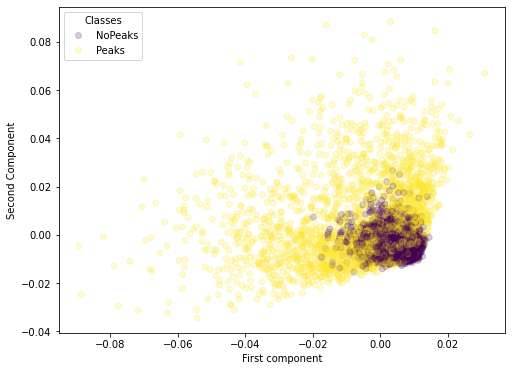

In [ ]:
# Plots after feature reduction

plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data[:,0], train_data[:,1], c=train_label, cmap='viridis',alpha=0.2)
#cmap=ListedColormap(['red', 'blue'])

plt.xlabel('First component')
plt.ylabel('Second Component')
'''
plt.xlabel('Average')
plt.ylabel('Maximum')'''

plt.legend(handles=scatter.legend_elements()[0], labels=['NoPeaks', 'Peaks'],loc="upper left", title="Classes")

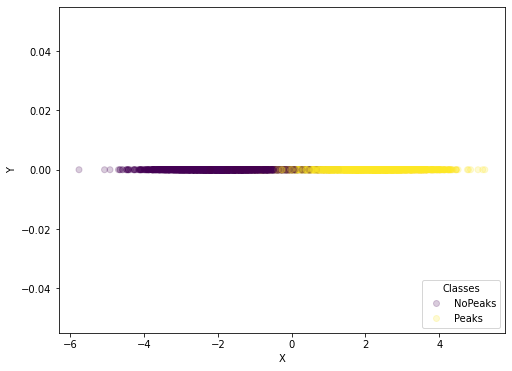

In [ ]:
# Plots after feature reduction (1D)

z1=np.zeros(train_data[:,0].shape)
plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data[:,0], z1, c=train_label, cmap='viridis',alpha=0.2)
#cmap=ListedColormap(['red', 'blue'])
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(handles=scatter.legend_elements()[0], labels=['NoPeaks', 'Peaks'],loc="lower right", title="Classes")

In [ ]:
# 3D plot for LDA
import plotly.express as px

z1=np.zeros(train_data[:,0].shape)
y1=np.zeros(train_data[:,0].shape)
fig = px.scatter_3d(train_data, x=train_data[:,0], y=y1, z=z1,
              color=train_label,size_max=18,opacity=1)
fig.show()

In [ ]:
np.save('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/chip-exp-3dplot/comp4_lda',train_data)

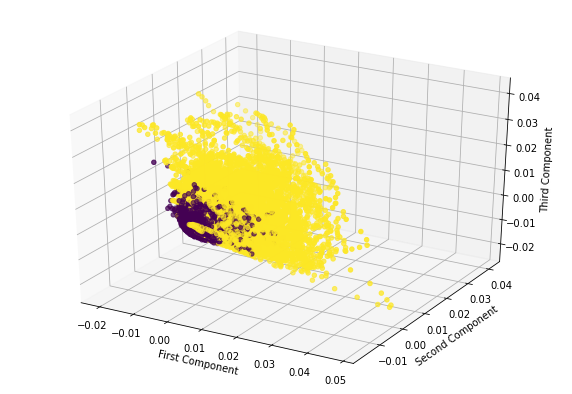

In [ ]:
# 3D plot

from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


# Creating plot
ax.scatter3D(train_data[:,0], train_data[:,1], train_data[:,2], c = train_label)

plt.xlabel('First Component')
plt.ylabel('Second Component')
ax.set_zlabel('Third Component')

# show plot
plt.show()

In [ ]:
# Normalize training set between 0 and 1
'''
train_data = train_data/np.linalg.norm(train_data)
print("Dataset normalized")
'''

Dataset normalized


# Split data

In [ ]:
# Split data for training and testing models

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state = 777)

print('x_train array shape = ' , x_train.shape)
print('x_test array shape = ' , x_test.shape)
print('y_train array shape = ' , y_train.shape)
print('y_test array shape = ' , y_test.shape)

x_train array shape =  (4069, 1)
x_test array shape =  (1745, 1)
y_train array shape =  (4069,)
y_test array shape =  (1745,)


# Plot functions

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, mean_squared_error
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

def plt_res(y_test, y_pred,ttl):

  #Generate the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title(ttl);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
# Summarize history for accuracy

def acc_plt(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [ ]:
# Summarize history for loss

def loss_plt(history):

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [ ]:
'''
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
'''

'\ndef display_scores(scores):\n    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))\n'

# Simple dense model

In [ ]:
# Keras and first simple network

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense



# define the keras model
model = Sequential()
model.add(Dense(50, input_shape=(win_size,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200100    
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 201,661
Trainable params: 201,661
Non-trainable params: 0
_________________________________________________________________


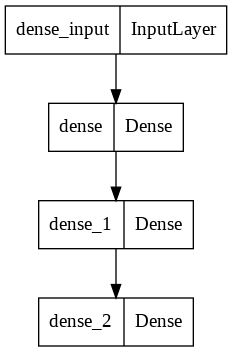

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
t0 = time()
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=30)
print('Training time = ', time()-t0)

Epoch 1/20
1932/1932 [==============================] - 23s 12ms/step - loss: 0.4471 - accuracy: 0.8598 - val_loss: 0.3001 - val_accuracy: 0.9023
Epoch 2/20
1932/1932 [==============================] - 21s 11ms/step - loss: 0.3023 - accuracy: 0.8969 - val_loss: 0.2872 - val_accuracy: 0.9039
Epoch 3/20
1932/1932 [==============================] - 17s 9ms/step - loss: 0.2965 - accuracy: 0.8975 - val_loss: 0.3397 - val_accuracy: 0.8789
Epoch 4/20
1932/1932 [==============================] - 20s 10ms/step - loss: 0.3002 - accuracy: 0.8967 - val_loss: 0.2844 - val_accuracy: 0.9044
Epoch 5/20
1932/1932 [==============================] - 21s 11ms/step - loss: 0.2965 - accuracy: 0.8982 - val_loss: 0.2869 - val_accuracy: 0.9031
Epoch 6/20
1932/1932 [==============================] - 19s 10ms/step - loss: 0.2935 - accuracy: 0.8992 - val_loss: 0.2910 - val_accuracy: 0.8992
Epoch 7/20
1932/1932 [==============================] - 13s 7ms/step - loss: 0.2964 - accuracy: 0.8986 - val_loss: 0.2964 - v

In [ ]:
y_pred_dense = model.predict(x_test)
y_pred_dense[y_pred_dense <= 0.5] = 0.
y_pred_dense[y_pred_dense > 0.5] = 1.

971/971 [==============================] - 3s 3ms/step


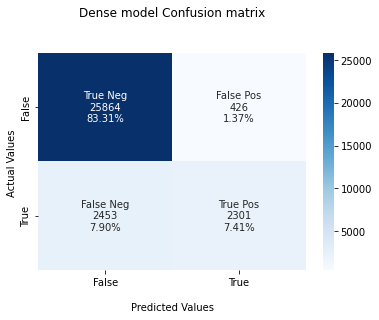

In [ ]:
plt_res(y_test, y_pred_dense,"Dense model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_dense))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     26290
         1.0       0.84      0.48      0.62      4754

    accuracy                           0.91     31044
   macro avg       0.88      0.73      0.78     31044
weighted avg       0.90      0.91      0.90     31044



In [ ]:
# Matthews Correlation Coefficient

print("MCC = ", matthews_corrcoef(y_test, y_pred_dense))

MCC =  0.5951518747297331


In [ ]:
# Balanced Accuracy

print(balanced_accuracy_score(y_test, y_pred_dense))

0.7339047912726453


In [ ]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

971/971 [==============================] - 3s 3ms/step - loss: 0.2773 - accuracy: 0.9073
test loss, test acc: [0.27729278802871704, 0.9072606563568115]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

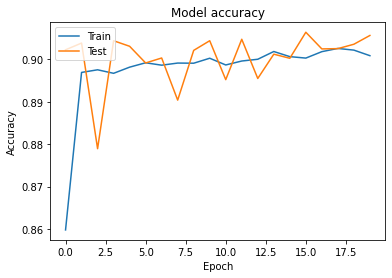

In [ ]:
acc_plt(history)

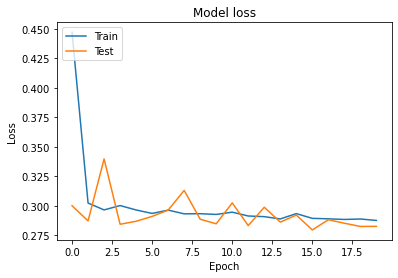

In [ ]:
loss_plt(history)

# Conv1D training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Dropout,Conv2D
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

# create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(win_size,1)))
model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(Conv1D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=30)

#XGBoost

In [ ]:
#***Machine learning methods such as XGBoost, SVM, etc., couldn't run on GPUs and crashed,but they worked well on CPUs. It needs to be researched.***

import xgboost as xgb

t0 = time()
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
scores = []
for train_index, test_index in kfold.split(x_train):   
    xx_train, xx_test = x_train[train_index], x_train[test_index]
    yy_train, yy_test = y_train[train_index], y_train[test_index]
    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    xgb_model.fit(xx_train, yy_train)
    y_pred_xgb = xgb_model.predict(xx_test)
    scores.append(mean_squared_error(yy_test, y_pred_xgb))

print('Training time = ', time()-t0) 
display_scores(np.sqrt(scores))
y_pred_xgboost = xgb_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Training time =  558.2985277175903
Scores: [0.47312779 0.47339932 0.47176784 0.4690361  0.46136046]
Mean: 0.470
Std: 0.004


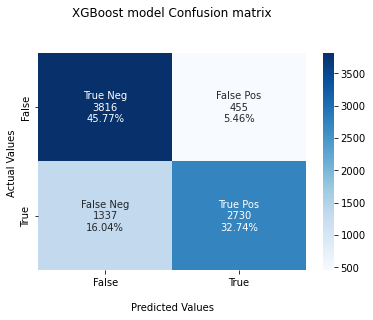

In [ ]:
plt_res(y_test, y_pred_xgboost,"XGBoost model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      4271
           1       0.86      0.67      0.75      4067

    accuracy                           0.79      8338
   macro avg       0.80      0.78      0.78      8338
weighted avg       0.80      0.79      0.78      8338



In [ ]:
# Matthews Correlation Coefficient

print("MMC = ", matthews_corrcoef(y_test, y_pred_xgboost))

MMC =  0.580969519388472


In [ ]:
# Balanced Accuracy

print(balanced_accuracy_score(y_test, y_pred_xgboost))

0.7823620131930875


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# K-fold Decision tree

kfold = KFold(n_splits=5, shuffle=False, random_state=None)
scores = []

t0 = time()

for train_index, test_index in kfold.split(x_train):   
    xx_train, xx_test = x_train[train_index], x_train[test_index]
    yy_train, yy_test = y_train[train_index], y_train[test_index]

    dtc = DecisionTreeClassifier()
    dtc.fit(xx_train, yy_train)
    
    y_pred_dt = dtc.predict(xx_test)
    
    scores.append(mean_squared_error(yy_test, y_pred_dt))

print('Training time = ', time()-t0)    
display_scores(np.sqrt(scores))
y_pred_dtree = dtc.predict(x_test)

Training time =  58.39609932899475


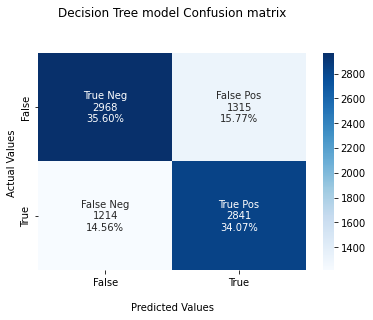

In [ ]:
plt_res(y_test, y_pred_dtree,"Decision Tree model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      4283
           1       0.68      0.70      0.69      4055

    accuracy                           0.70      8338
   macro avg       0.70      0.70      0.70      8338
weighted avg       0.70      0.70      0.70      8338



In [ ]:
print("Matthews Correlation Coefficient = ", matthews_corrcoef(y_test, y_pred_dtree))

Matthews Correlation Coefficient =  0.393443474431589


In [ ]:
# Balanced Accuracy

print(balanced_accuracy_score(y_test, y_pred_dtree))

0.6967943692739886


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
t0 = time()
reg.fit(x_train, y_train)
print('Training time = ', time()-t0)
y_pred_lreg = reg.predict(x_test)

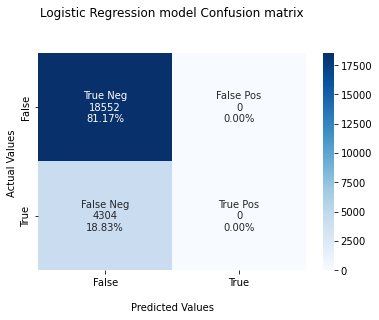

In [ ]:
plt_res(y_test, y_pred_lreg,"Logistic Regression model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_lreg))

In [ ]:
print("Matthews Correlation Coefficient = ", matthews_corrcoef(y_test, y_pred_lreg))

Matthews Correlation Coefficient =  0.0


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
t0 = time()
rfc.fit(x_train, y_train)
print('Training time = ', time()-t0)
y_pred_rf = rfc.predict(x_test)

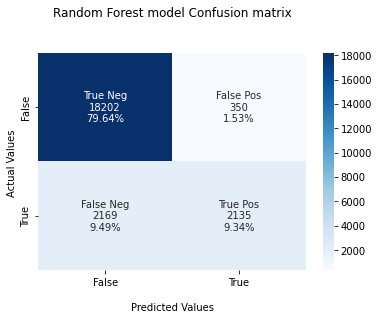

In [ ]:
plt_res(y_test, y_pred_rf,"Random Forest model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
print("Matthews Correlation Coefficient = ", matthews_corrcoef(y_test, y_pred_rf))

Matthews Correlation Coefficient =  0.5993055097191781


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
t0 = time()
svc.fit(x_train, y_train)
print('Training time = ', time()-t0)
y_pred_svm = svc.predict(x_test)

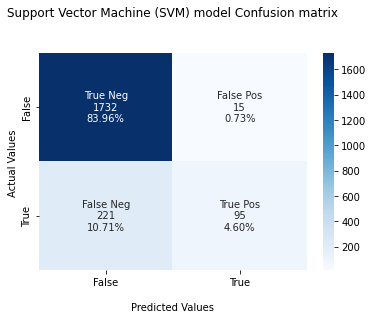

In [ ]:
plt_res(y_test, y_pred_svm,"Support Vector Machine (SVM) model Confusion matrix\n\n")

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
print("Matthews Correlation Coefficient = ", matthews_corrcoef(y_test, y_pred_svm))

Matthews Correlation Coefficient =  0.4679372604512164


# Other algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#xgb.XGBClassifier(objective="binary:logistic")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
#DummyClassifier(strategy="most_frequent")

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:

t0 = time()
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
scores = []
acc_lst = []
for train_index, test_index in kfold.split(x_train):   
    xx_train, xx_test = x_train[train_index], x_train[test_index]
    yy_train, yy_test = y_train[train_index], y_train[test_index]
    other_model = DummyClassifier(strategy="most_frequent")
    other_model.fit(xx_train, yy_train)
    y_pred_other = other_model.predict(xx_test)
    acc_lst.append((round(accuracy_score(yy_test, y_pred_other),4))*100)

print('Training time = ', time()-t0) 
#display_scores(np.sqrt(scores))
print(acc_lst)
y_pred_other = other_model.predict(x_test)

Training time =  0.010806560516357422
[50.86000000000001, 52.83, 52.580000000000005, 49.75, 49.82]


In [ ]:
import numpy as np

# count the number of 1's in the array
num_ones = np.count_nonzero(y_pred_other == 1)

print("Number of ones:", num_ones)

Number of ones: 0


Acuuracy =  51.4 



 recall =  (0.2570200573065903, 0.5, 0.33951551854655565, None) 

Balanced accuracy 50.0 

MCC =  0.0 



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


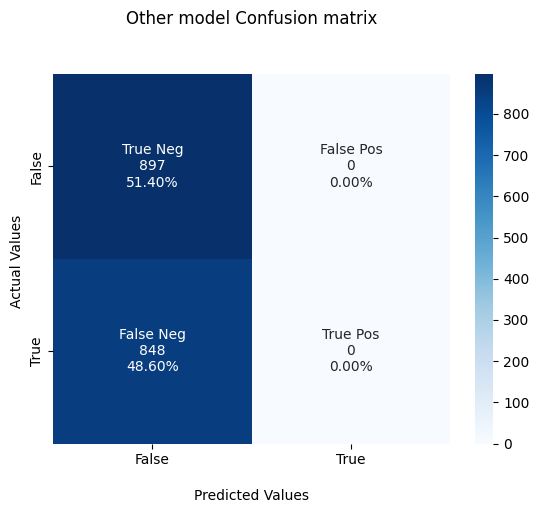

In [ ]:
# Accuracy
print("Acuuracy = ", round(accuracy_score(y_test, y_pred_other),4)*100,"\n")

# Precision, recall, F-measure
print("\n\n recall = ", precision_recall_fscore_support(y_test, y_pred_other,average='macro'),"\n")

# Balanced Accuracy
print("Balanced accuracy",round(balanced_accuracy_score(y_test, y_pred_other),4)*100,"\n")

# Matthews Correlation Coefficient
print("MCC = ", round(matthews_corrcoef(y_test, y_pred_other),4)*100,"\n")

plt_res(y_test, y_pred_other,"Other model Confusion matrix\n\n")

# Plotting decision regions 2D

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


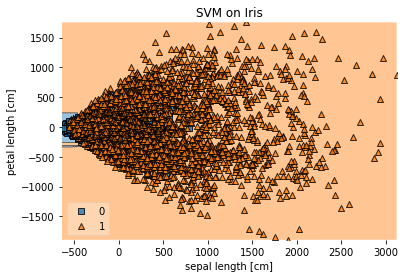

In [ ]:

# Plotting decision regions 2D
y_test_bound = y_test.astype(int)
plot_decision_regions(x_test, y_test_bound, clf=other_model, legend=3)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

# Plot coverage.bedgraph file

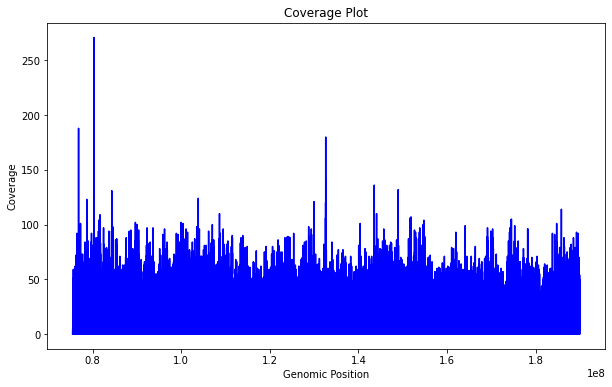

In [ ]:
import numpy as np
# read data from the file
data = np.loadtxt('/content/coverage.bedGraph', usecols=(1, 2, 3))

# plot the 
fig = plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 2], color='blue')
plt.xlabel('Genomic Position')
plt.ylabel('Coverage')
plt.title('Coverage Plot')

# show the plot
plt.show()

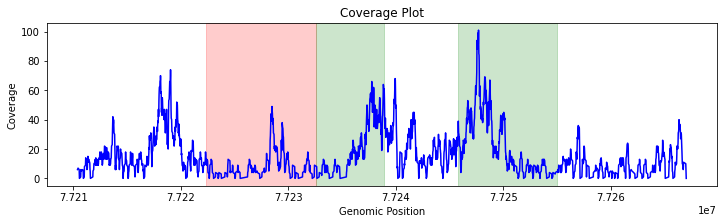

In [ ]:
# read data from the file
data = np.loadtxt('/content/coverage.bedGraph', usecols=(1, 2, 3))

# subset data to the specific genomic region
start_pos = 77210375
end_pos = 77267036
mask = (data[:, 0] >= start_pos) & (data[:, 0] <= end_pos)
data = data[mask, :]

# create a new figure with a larger size
fig = plt.figure(figsize=(12, 3))

# plot the data
plt.plot(data[:, 0], data[:, 2], color='blue')
plt.xlabel('Genomic Position')
plt.ylabel('Coverage')
plt.title('Coverage Plot')

plt.axvspan(77222375, 77232602, alpha=0.2, color='red')
plt.axvspan(77232603, 77238871, alpha=0.2, color='green')
plt.axvspan(77245799, 77255036, alpha=0.2, color='green')

# show the plot
plt.show()